# Section 0. Environment Set Up

Mount your google drive in google colab

### Logistic Regression and Regularization

In [ ]:
# We use Pytorch to check.
# Notice that Colab now supports native Pytorch. You do not need to install Pytorch on your own.
import torch

In [ ]:
# Check whether GPU is available
torch.cuda.is_available()

True

In [ ]:
# Check the name of the GPU
torch.cuda.get_device_name()

'Tesla P4'

In [ ]:
# Check GPU id
torch.cuda.current_device()

0

In [ ]:
# Set device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········


Append the directory to your python path using sys.

**Please do modify the `customized_path_to_your_homework` to where you uploaded your homework in the Google Drive**

In [ ]:
import sys
import os
prefix = '/content/gdrive/My Drive/'
# modify "customized_path_to_your_homework" here to where you uploaded your homework
customized_path_to_your_homework = 'AML/HW2/Coding/'
sys_path = os.path.join(prefix, customized_path_to_your_homework)
sys.path.append(sys_path)

# Section 1. Logistic Regression 

## Logistic Regression
In this section, you need to implement logsitic regression to solve a binary classification problem. Let's first get our data ready:

In [ ]:
import os
logistic_x_data_path = os.path.join(prefix, customized_path_to_your_homework, 'data/logistic_x_.txt')
logistic_y_data_path = os.path.join(prefix, customized_path_to_your_homework, 'data/logistic_y_.txt')


NameError: ignored

In [ ]:
def feature_normalize(X):
    
    # FEATURENORMALIZE Normalizes the features in X 
    #   FEATURENORMALIZE(X) returns a normalized version of X where the mean value of each
    #   feature is 0 and the standard deviation is 1. This is often a good preprocessing 
    #   step to do when working with learning algorithms.
    
    X_norm = X
    mu     = 0
    sigma  = 0

    X_norm = X
    mu     = np.mean(X, 0)
    sigma  = np.std(X, 0)
    X      = (X - mu) / sigma
    X_norm = X;
  
    return X_norm, mu, sigma

In [ ]:
import numpy as np

# Only use the first 70 samples for training (and validation),
# and treat the rest of them as hold-out testing set.
num_training=70
mask=list(range(num_training))
X = np.loadtxt(logistic_x_data_path) 
y = np.loadtxt(logistic_y_data_path).reshape(-1, 1)[mask]


X, mu, std = feature_normalize(X)

# Add a column of ones to X for the bias weight.
m = len(X)
X = np.concatenate((np.ones((m, 1)), X), axis=1)[mask]

# Printing data for validation
print("Shape of X:",X.shape)
print("Shape of y:",y.shape)


Shape of X: (70, 3)
Shape of y: (70, 1)


Here, the input $x^{(i)}\in\mathbb{R^2}$ and $y^{(i)}\in\{-1, 1\}$. Like we have mentioned, it is better to visualize the data first before you start working on it.

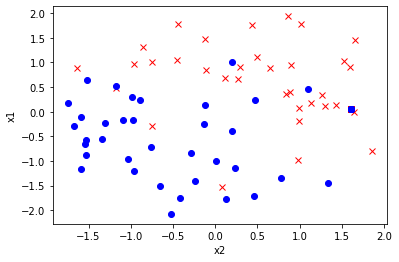

In [ ]:
# Plot the feature according to their class label.
# Note that we exclude column 0, which is the colunm we padded with one in the previous block.
import matplotlib.pyplot as plt
plt.plot(X[np.where(y==1), 1], X[np.where(y==1), 2], 'rx')
plt.plot(X[np.where(y==-1), 1], X[np.where(y==-1), 2], 'bo')  
plt.xlabel('x2')
plt.ylabel('x1')
plt.show()

In the following, you need to implement logistic regression. Recall that when $y^{(i)}\in{-1,1}$, the objective function for binary logistic regression can be expressed as:
\begin{equation*}
J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\log{\left(1+e^{-y^{(i)\theta^Tx^{(i)}}}\right)}=-\frac{1}{m}\sum_{i=1}^m\log{\left(h_{\theta}(y^{(i)}x^{(i)})\right)}
\end{equation*}
where the hypothesis is the **sigmoid function**: 
\begin{equation*}
h_\theta(y^{(i)}x^{(i)})=\frac{1}{1+e^{-y^{(i)}\theta^{T}x^{(i)}}}
\end{equation*}
which we have seen in class (and assignment 0). Similar to the previous section, we can minimize the objective function $J(\theta)$ using  batch gradient descent:
\begin{equation*}
\theta_j := \theta_j - \alpha \frac{1}{m}\sum_{i=1}^{m}h_\theta(-y^{(i)}x^{(i)})(-y^{(i)}x_j^{(i)})
\end{equation*}

Now, your task is to complete the function `sigmoid`, `compute_cost`, `gradient_descent` for logistic regression.

In [ ]:
def sigmoid(z):
    #####################################################################
    # Instructions: Implement sigmoid function g                        #
    #####################################################################
    g=1/(1+np.exp(-z))
    #####################################################################
    #                       END OF YOUR CODE                            #
    #####################################################################
    return g

def compute_cost(X, y, theta):
    
    # You need to return the following variables correctly 
    J = 0;
    #####################################################################
    # Instructions: Implement the objective function J(theta)           #
    #####################################################################
    z=y*np.dot(X,theta)
    J=(-1)*np.mean(np.log(sigmoid(z)))
    #####################################################################
    #                       END OF YOUR CODE                            #
    #####################################################################
    return J

def compute_gradient(X, y, theta):
    #####################################################################
    # Instructions: Implement gradient function gradient_               #
    #####################################################################
    
    z=y*np.dot(X,theta)
    gradient_=np.mean(((1-sigmoid(z)).reshape(1,X.shape[0]))*np.transpose(-y*X),axis=1).reshape(theta.shape[0],1)

    #####################################################################
    #                       END OF YOUR CODE                            #
    #####################################################################
    return gradient_


def gradient_descent_logistic(X, y, theta, alpha, num_iters):
    
    J_history = []
    for iter in range(num_iters):

        
        #####################################################################
        # Instructions: Perform a single gradient step on the parameter     #
        #               vector theta using the implemented compute_gradient #
        #                                                                   #      
        # Hint: While debugging, it can be useful to print out the values   #
        #       of the cost function (compute_cost) and gradient here.      # 
        #####################################################################
        temp=theta-alpha*compute_gradient(X,y,theta)
        theta=temp
        #####################################################################
        #                       END OF YOUR CODE                            #
        #####################################################################
    

        # Save the cost J in every iteration 
        J = compute_cost(X, y, theta)
        print(J)
        J_history.append(J)
    
    return theta, J_history

Now, fit your model, and see if it is learning.

In [ ]:
# Train your model.
theta = np.zeros((X.shape[1], 1))
alpha = 0.1;
num_iters = 400;

# sanity checking
print("Shape of X:",X.shape)
print("Shape of y:",y.shape)
print("Shape of theta:",theta.shape)

theta, J_history = gradient_descent_logistic(X, y, theta, alpha, num_iters)
print("Theta is:\n",theta,"\n\n Shape:",theta.shape)

Shape of X: (70, 3)
Shape of y: (70, 1)
Shape of theta: (3, 1)
0.6767577092260898
0.6613327555041996
0.6468133763213969
0.6331429900351121
0.6202675937692236
0.6081359025691552
0.5966994219690991
0.5859124653599829
0.5757321268498097
0.5661182193014416
0.5570331860650165
0.5484419937054378
0.5403120118392832
0.5326128850917309
0.5253164011922967
0.5183963583615067
0.5118284344006756
0.5055900592778382
0.4996602924941345
0.49401970610397056
0.48865027393579347
0.4835352673053119
0.4786591573175655
0.47400752370754606
0.46956697006187625
0.4653250451882765
0.4612701703486021
0.4573915720395126
0.45367921998789873
0.45012377002233556
0.446716511484213
0.4434493188504588
0.4403146072521653
0.43730529158853787
0.43441474895234855
0.4316367841007006
0.4289655977227841
0.42639575727399964
0.42392217016303946
0.421540059095024
0.4192449393894682
0.4170325981066151
0.41489907482947347
0.4128406439617495
0.4108537984137516
0.40893523455933317
0.4070818383570446
0.40529067253793827
0.403558964770

Again, plot and check to see if the model is converging.

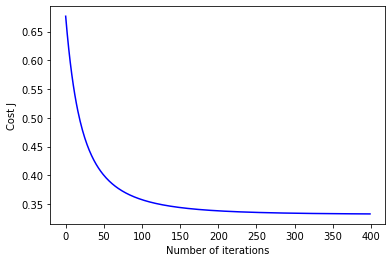

In [ ]:
plt.plot(list(range(0, len(J_history))), J_history, '-b')  
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

## Decision Boundary
In addition to checking convergence graph and accuracy, we can also plot out the decision boundary to see what does the model actually learn.

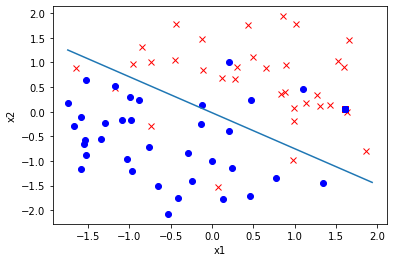

In [ ]:
# Plot the feature according to their class label.
# Note that we exclude column 0, which is the colunm we padded with one in the previous block.
plt.plot(X[np.where(y==1), 1], X[np.where(y==1), 2], 'rx')
plt.plot(X[np.where(y==-1), 1], X[np.where(y==-1), 2], 'bo')

#####################################################################
# Instructions: Plot out the decision boundary.                     #
# Hint: To plot the boundary, which is a straight line in our case, #
#       you need to find the two ends of the line, and plot it with #
#       plt.plot(). Note that the decision boundary is the line that#
#       y = 0.                                                      # 
#####################################################################
x_values = [np.min(X[:, 1]), np.max(X[:, 2])]
#print("X values:",x_values)
#print("theta zero",theta[0,0])
#print("theta one",theta[1,0])
#print("theta two",theta[2,0])
y_values=- (theta[0,0] + np.dot(theta[1,0], x_values))/ theta[2,0] 
#print("y values:",y_values)
plt.plot(x_values, y_values, label='Decision Boundary')
#####################################################################
#                       END OF YOUR CODE                            #
#####################################################################

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Section 2. Regularization 

In this section, you need to incorporate L2 regularization into your logistic regression. 

## L2 Regularization
Overfitting is a notorious problem in the world of machine learning. One simple way to counter this issue is to put constraints on your model weights $\theta$, as we have discussed in class. In this section, you need to modify the the objective function to impose L2 regularization on the logistic regression:
\begin{equation*}
    J(\theta) = -\frac{1}{m}\sum_{i=1}^m\log{\left(h_{\theta}(y^{(i)}x^{(i)})\right)} + \frac{1}{2m}\lambda\vert\vert\theta\vert\vert_2^2
\end{equation*}
Derive the gradient for this new objective to incorporate it into your logistic regression model.

To make things much structural, we now put everything together into a class. Please use the class template below to implement your logistic regression. Note that you can add your own class methods if needed.

In [ ]:
class LogisticRegression(object):
    
    def __init__(self, alpha=0.1, lamb=0.1, regularization=None):
        # setting the class attribute.
        self.alpha = alpha                   # Set up your learning rate alpha.
        self.lamb = lamb                     # Strength of regularization i.e. regularization parameter.
        self.regularization = regularization 
        
        assert regularization == 'l2' or regularization == None # we only consider these two cases

    def sigmoid(self,z):
        #####################################################################
        # Instructions: Implement sigmoid function g                        #
        #####################################################################
        g=1/(1+np.exp(-z))
        #####################################################################
        #                       END OF YOUR CODE                            #
        #####################################################################
        return g
    
    def _compute_cost(self, X, y):  # Cost with regularization
        #####################################################################
        # Instructions: Compute the cost function here.                     #
        #               You need to handle both the cases with, and without #
        #               regularization here.                                #
        #####################################################################
        J=0
        m=len(y)
        z= y*np.dot(X,self.theta)
        J=(-1)*np.mean(np.log(self.sigmoid(z)),axis=0)[0]
        reg=(1/m)*self.lamb*np.sum(self.theta[1:,:]**2,axis=0)[0]
        J=J+reg
        #####################################################################
        #                       END OF YOUR CODE                            #
        #####################################################################
        return J
        
    def _compute_gradient(self, X, y):
        #####################################################################
        # Instructions: Compute the gradient here.                          #
        #               You need to handle both the cases with, and without #
        #               regularization here.                                #
        #####################################################################
        m = len(y)
        z = y*np.dot(X,self.theta)
        gradient_=np.mean(((1-self.sigmoid(z)).reshape(1,X.shape[0]))*np.transpose(-y*X),axis=1).reshape(self.theta.shape[0],1)
        gradient_[1:,:]=gradient_[1:,:]+ (1/m)*self.lamb*self.theta[1:,:]
        #print("gradient shape:",gradient_.shape)
        
        #####################################################################
        #                       END OF YOUR CODE                            #
        #####################################################################
        return gradient_

    def fit(self, X, y, num_iter=5):
        m = len(y)
        J_history = []
        self.theta = np.zeros((X.shape[1], 1))
        #####################################################################
        # Instructions: Run the gradient decsent here.                      #
        #####################################################################
        for iter in range(num_iters):

          temp=self.theta-(self.alpha)*self._compute_gradient(X,y)
                    
          self.theta=temp
          
          # Save the cost J in every iteration 
          J = self._compute_cost(X, y)
          #print("Cost is:",J)
          #print("Theta is:",self.theta)
          J_history.append(J)
        return J_history, self.theta
    
    def predict(self, X):
        #####################################################################
        # Instructions: Use your hypothese to make predictions.             #
        #####################################################################
        z=np.dot(X,self.theta)
        y_hat=self.sigmoid(z)
        #####################################################################
        #                       END OF YOUR CODE                            #
        #####################################################################
        return y_hat

In [ ]:
def feature_normalize(X):
    
    # FEATURENORMALIZE Normalizes the features in X 
    #   FEATURENORMALIZE(X) returns a normalized version of X where the mean value of each
    #   feature is 0 and the standard deviation is 1. This is often a good preprocessing 
    #   step to do when working with learning algorithms.
    
    X_norm = X
    mu     = 0
    sigma  = 0

    X_norm = X
    mu     = np.mean(X, 0)
    sigma  = np.std(X, 0)
    X      = (X - mu) / sigma
    X_norm = X;
  
    return X_norm, mu, sigma

Load the wine datasets, in which $x_j\in\mathbb{R}^{12}$ is different attribute for alcohol, and $y\in\{-1,1\}$ is that class label (red or white wine).

In [ ]:
# Load dataset
import numpy as np
import os
import matplotlib.pyplot as plt


X_train = np.loadtxt(os.path.join(prefix, customized_path_to_your_homework, 'data/wine_train_X.txt'))
y_train = np.loadtxt(os.path.join(prefix, customized_path_to_your_homework, 'data/wine_train_y.txt')).reshape(-1, 1)
X_test = np.loadtxt(os.path.join(prefix, customized_path_to_your_homework, 'data/wine_test_X.txt'))
y_test = np.loadtxt(os.path.join(prefix, customized_path_to_your_homework, 'data/wine_test_y.txt')).reshape(-1, 1)

X_train ,mu_train, std_train= feature_normalize(X_train)
X_test, mu_test, std_test=feature_normalize(X_test) 


# Add a column of ones to X for the bias weight.
X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)

# sanity check
print("X_train:",X_train.shape)
print("y_train",y_train.shape)
print("X_test:",X_test.shape)
print("y_test:",y_test.shape)
print("theta:",np.zeros((X_train.shape[1], 1)).shape)

X_train: (800, 13)
y_train (800, 1)
X_test: (400, 13)
y_test: (400, 1)
theta: (13, 1)


Now, let's train two different logistic regression models: one with, and one without regularization.

In [ ]:
log_reg = LogisticRegression(alpha=0.1) # Without regularization
log_reg_l2 = LogisticRegression(alpha=0.1, lamb=1.0, regularization='l2') # With regularization

J_history = log_reg.fit(X_train, y_train, num_iter=500) # Without regularization
J_history_l2 = log_reg_l2.fit(X_train, y_train, num_iter=500)  # With regularization



Next, we evaluate the accuracy for each method:

In [ ]:
def evaluate_accuracy(X, y, model):
    y_pred = model.predict(X)
    y_pred[y_pred > 0.5] = 1
    y_pred[y_pred <= 0.5] = -1
    return np.mean(y_pred == y)

print("Accuracy on training set: ", evaluate_accuracy(X_train, y_train, log_reg))
print("Accuracy on testing set: ", evaluate_accuracy(X_test, y_test, log_reg))
print("Accuracy w/ L2 training set: ", evaluate_accuracy(X_train, y_train, log_reg_l2))
print("Accuracy w/ L2 testing set: ", evaluate_accuracy(X_test, y_test, log_reg_l2))

Accuracy on training set:  0.9925
Accuracy on testing set:  0.9925
Accuracy w/ L2 training set:  0.9925
Accuracy w/ L2 testing set:  0.9925


To see the effect of regularization on $\theta$, we can plot out each $\theta_j$ under different $\lambda$.

In [ ]:
def plot_theta(theta, lamb):
    """
    Helper function for plotting out the value of theta with respect to different lambda.
    theta  (list): list of theta under different lambda.
    lambda (list): list of lambda values you tried.
    """
    plt.hlines(y=0, xmin=0, xmax=np.max(lamb), color='red', linewidth = 2, linestyle = '--')
    for i in range(theta.shape[1]):
        plt.plot(lamb, theta[:,i])
    plt.ylabel('theta')
    plt.xlabel('lambda')
    plt.xscale('log')
    plt.show()

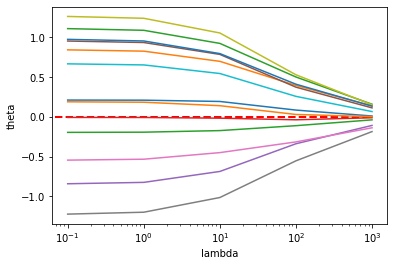

In [ ]:
lamb = [0.1, 1, 10, 100, 1000]
theta = []

#####################################################################
# Instructions: For each value in lamb, try a model for it, and     #
#               append the trained weights into the theta           #
#####################################################################
for l in lamb:
  log_reg_l2 = LogisticRegression(alpha=0.1, lamb=l, regularization='l2') # With regularization
  J_history_l2, theta_lg = log_reg_l2.fit(X_train, y_train, num_iter=500)  # With regularization
  #print("theta_lg is:",theta_lg.reshape(1,13))
  theta.append(theta_lg)
  

#####################################################################
#                       END OF YOUR CODE                            #
#####################################################################
#print(np.array(theta).shape[1])
plot_theta(np.array(theta), lamb)